## MLP and 2-stage Autoenoder for Predicting the quality of Red wine
**Author: Prathyusha Sangam**

**References:**
* Textbook: Hands-On Machine Learning with Scikit-Learn and TensorFlow
* Python / Tensor Flow documentation

### Document Outline
* [About the data](#About-the-data)
* [Project objective](#Project-objective)
* [Step 0: Set up imports](#Step-0:-Set-up-imports)
* [Step 1: Load data and perform train-test splits](#Step-1:-Load-data-and-perform-train-test-splits)
    * [Descriptive Statistics](#Descriptive-Statistics)
    * [Test Train splits](#Test-Train-splits)
* [Step 2: Manipulating train and test splits for model 1](#Step-2:-Manipulating-train-and-test-splits-for-model-1)
* [Step 3: Model 1 - DNN regressor](#Step-3:-Model-1---DNN-regressor)
    * [Specifications](#Specifications)
    * [A special note on the hyperparameters batch_size, num_epochs and steps (as provided by tensor flow) ](#A-special-note-on-the-hyperparameters-batch_size,-num_epochs-and-steps-[of-tensor-flow-tf.estimator-classes])
* [Step 4: Training Model 1 DNN Regressor](#Step-4:-Training-Model-1-DNN-Regressor)   
* [Step 5: Reporting MSEs of Model 1 DNN Regressor](#Step-5:-Reporting-RMSEs-of-model-1-DNN-Regressor)   
    * [Plot of actual vs predicted Quality values Model 1](#Plot-of-actual-vs-predicted-Quality-values---Model-1)   
* [Step 6: Model 2 stage 1 Autoencoder with 1-hidden layer](#Step-6:-Model-2-stage-1--Autoencoder-with-1-hidden-layer)
* [Step 7: Train the autoencoder](#Step-7:-Train-the-autoencoder)
* [Step 8: 2nd stage of model 2 DNNRegressor](#Step-8:-2nd-stage-of-model-2---DNNRegressor)
* [Step 9: Apply transformation to test set and report the RMSEs](#Step-9:-Apply--transformation-to-the-labelled-training-data-and-train-stage-2-DNN-regressor)
* [Step 10: Apply transformation to test set and report the RMSEs](#Step-10:-Apply-transformation-to-test-set-and-report-the-RMSEs)
    * [Plot of actual vs predicted Quality values - Model 2](#Plot-of-actual-vs-predicted-Quality-values---Model-2)
    * [Performance comparison of models on the current run](#Performance-comparison-on-the-current-run)
* [Step 11: Reporting performance on multiple runs](#Step-11:-Reporting-performance-on-multiple-runs)

### About the data

**Red Wine Quality data set:** 
* The dataset is obtained from UCI ML repository; it was originally contributed by University of Minho, Guimarães and Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal. 
* It is related to red wine variants of the Portuguese "Vinho Verde" wine. The data contains 1600 rows (including header) and 12 columns. There are 11 attributes of wine; the column "quality"(ranging from 0 to 8) corresponds to the target (value to predict).

### Project objective

The aim of the project is to perform regression tasks to predit value of Quality using 2 neural net based models as below:
* Model 1: a MLP with two hidden layers, using Tensorflow's DNNRegressor
* Model 2: a 2-stage network consisting of an autoencoder in stage 1 and an MLP in stage 2.

### Step 0: Set up imports

In [1]:
#Data manipulation
import numpy as np
import pandas as pd
import os

# Visualization
import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# allowing multiple/scrollable outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#tensor flow for NN
import tensorflow as tf

# randomseed (as specified)
import random
from datetime import datetime
random.seed(datetime.now())

**[Back To Top](#Document-Outline)**

### Step 1: Load data and perform train-test splits

* CSV file is loaded and some preliminary descriptive analysis is performed on the data (findings are as below)
* 80/20 random split is done to get the training set (X train), test set (X test), and the corresponding training (y train) and test labels (y test)
* All the four data items above are converted into simple Python arrays

In [2]:
#load data
dataset = pd.read_csv("Datasets/winequality-red.csv", sep=';')

# # uncomment view data
# dataset.head()

### Descriptive Statistics

* The target values of Quality lie between 3-8. There are more samples of Quality= 5,6 than the others. (uneven samples)
* From the histograms we see citric acid, volatile acidity and free sulphur dioxide are multimodal. Other features seem to have 1 dominantly occuring value (mode), over all we observe skewed distributions in all features.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


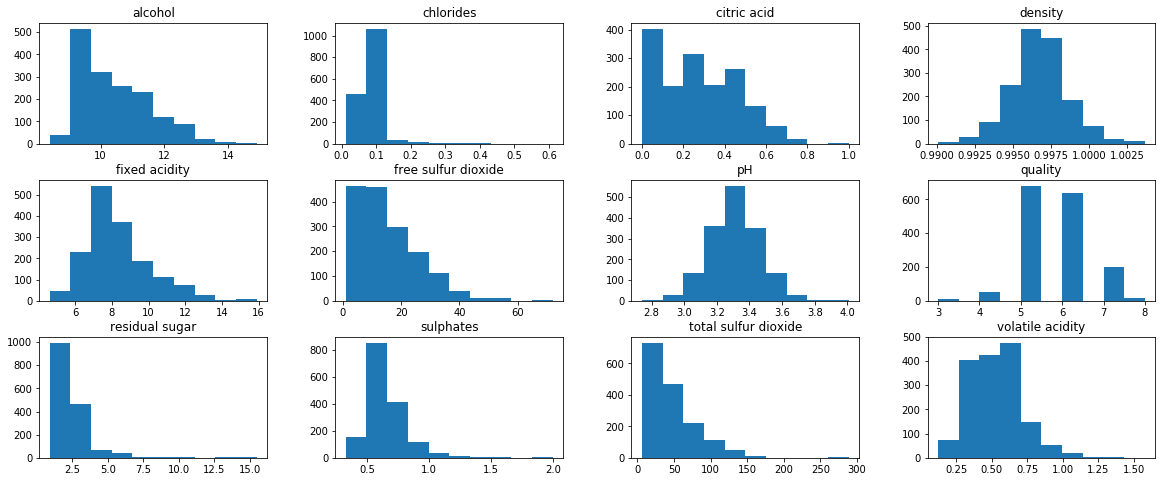

In [3]:
# understanding the data: Descriptive Statistics
dataset.describe()
 
_= dataset.hist(layout = (3,4),figsize=(20,8), grid = False)

### Test-Train splits

In [4]:
#Separating X and y from original dataframe

X = dataset.drop('quality', axis=1)
y = dataset['quality']

#test train splits - random, 80/20

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


# converting into simple arrays

X_train = np.c_[X_train]
X_test = np.c_[X_test]
y_train = np.c_[y_train]
y_test = np.c_[y_test]

#uncomment to view the arrays
# X_train
# X_test
# y_train
# y_test

**[Back To Top](#Document-Outline)**

###  Step 2: Manipulating train and test splits for model 1

* The training set X_train, y_train are divided into two parts (only the first half used to train MLP)
* The first half of X_train and y_train are used as labelled training set - called xtrain, ytrain
* The second half of X_train and y_train (called X_train2, y_train2) are merged with X_test, y_test to obtain the modified test sets xtest and ytest

In [5]:
# dividing training set into two equal parts

xtrain = X_train[:640]
X_train2 = X_train[639:]

ytrain = y_train[:640]
y_train2 = y_train[639:]

# combining 2nd halves of training set into the test set

xtest = np.concatenate((X_test, X_train2), axis=0)
ytest = np.concatenate((y_test, y_train2), axis=0)

**[Back To Top](#Document-Outline)**

### Step 3: Model 1 - DNN regressor

#### Specifications

* Model 1 is trained using the **tf.estimator.DNNRegressor** class.
* Hyperparameter values for the model are:
    * batch_size = 50
    * num_epochs = 1000
    * steps = 4000
* For the optimizer, tf.train.ProximalAdagradOptimizer is used, with learning rate 0.01  and L1 regularization strength set to and 0.001.


In [6]:
# Function credits: Dr. Du

## in the original function shared by Dr.Du, batch_size =1 and num_epochs = 10 were used
## whereas in the assessment sheet, the required values are batch_size=50, num_epochs = 1000
## hence code is modified slightly


# for training

def training_input_fn(xtrain, ytrain, batch_size, num_epochs):
    return tf.estimator.inputs.numpy_input_fn(
    x={'X': xtrain.astype(np.float32)},
    y=ytrain.astype(np.int32),
    batch_size=batch_size,
    num_epochs=num_epochs,
    shuffle=True)


# for testing

def test_input_fn(xtest, ytest):
    return tf.estimator.inputs.numpy_input_fn(
    x={'X': xtest.astype(np.float32)},
    y=ytest.astype(np.int32),
    num_epochs=1,
    shuffle=False)

In [7]:
#hyperparams

steps = 4000
n_hidden1 = 35
n_hidden2 = 45
batch_size = 50
num_epochs = 1000 # hyperparameter passed to training_input_fn()

learning_rate=0.01
l1_reg_strength=0.001

feature_columns = [tf.feature_column.numeric_column('X', shape = (11,))]

#defining the estimator
model = tf.estimator.DNNRegressor(
    feature_columns = feature_columns,
    hidden_units=[n_hidden1, n_hidden2],
    optimizer=tf.train.ProximalAdagradOptimizer(learning_rate=learning_rate,l1_regularization_strength=l1_reg_strength)
    )


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpqwolc3ov', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x119a4f0b8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


**[Back To Top](#Document-Outline)**

### A special note on the hyperparameters batch_size, num_epochs and steps [of tensor flow tf.estimator classes]

***P.S: I have provided all hyperparameters as specified in the assessment sheet.***

* The num_epochs and batch_size values are to be set in training_input_fn() while the steps can be set in the estimator.train() function.
* There seems to be quite some confusion over the relationship between steps, batch_size and num_epochs hyperparameters, in tf.estimator classes due to the lack of a solid documentation on tensor flow.

Known Definitions:
* Epoch: One pass through the entire data.
* Batch size: The number of data samples in each batch.
* Steps: The number of times the training loop in your learning algorithm will run to update the parameters in the model. In each loop iteration, it will process a chunk of data, which is basically a batch. 

when "steps" value is not explicitly mentioned; num_epochs, batch_size and the data size seem to define the number of steps. When "steps" is mentioned, num_epochs specification seems to get overridden.

Some experiments performed:
* In my experiments, using 1599 (all) data points and the batch_size = 1, num_epochs = 10, and not specifying steps led to 6400 steps. 
* using batch_size=50, num_epochs=1000 (as required) and not specifying steps led to 12800 steps
* **using batchsize=1, num epochs=10 (as in Dr. Du's original function) OR batch_size=50, num_epochs=1000(as required), along with steps=4000 led to training loop to run only 4000 times, it seems as though the hyperparams batch_size and num_epochs dint take effect.**
* [More discussion on stackoverflow regarding this can be seen here.](https://stackoverflow.com/questions/42816124/steps-vs-num-epochs-in-tensorflow-getting-started-tutorial)

Ways of running the entire training chunk 1000 times (epochs):
* From the textbook i noticed the author has used a for() loop to define the number of epochs.
* Running 1000 epochs in this fashion has consumed a lot of time and hence i have kept the value as 10 for simplicity purposes. This leads to 4000 x 10 = 40,000 steps, time elapsed: 1 min 30 sec (please uncomment epochs =1000 to run the for loop 1000 times)
* I have given all hyperparameters as specified in the sheet, the above discussion to add a note on my observations.



**[Back To Top](#Document-Outline)**

### Step 4: Training Model 1 DNN Regressor
* In this step the DNN regressor is trained and evaluated, a brief report of MSEs is provided in next step


In [8]:
# #training

epochs = 10 # used by for() loop, will lead to 40,000 steps, time elapsed ~ 1 min 30 sec
#epochs = 1000 #please uncomment this if you want to try 1000 epochs

for epoch in range(epochs):
    model.train(input_fn = training_input_fn(xtrain, ytrain, batch_size=batch_size, num_epochs=num_epochs),
            steps = steps);

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpqwolc3ov/model.ckpt.
INFO:tensorflow:loss = 748.0799, step = 1
INFO:tensorflow:global_step/sec: 259.667
INFO:tensorflow:loss = 41.931026, step = 101 (0.386 sec)
INFO:tensorflow:global_step/sec: 559.607
INFO:tensorflow:loss = 24.537783, step = 201 (0.178 sec)
INFO:tensorflow:global_step/sec: 510.438
INFO:tensorflow:loss = 22.281168, step = 301 (0.196 sec)
INFO:tensorflow:global_step/sec: 523.328
INFO:tensorflow:loss = 37.600647, step = 401 (0.193 sec)
INFO:tensorflow:global_step/sec: 570.441
INFO:tensorflow:loss = 25.78759, step = 501 (0.175 sec)
INFO:tensorflow:global_step/sec: 587.862
INFO:tensorflow:loss = 37.338093, step = 601 (0.171 sec)
INFO:tensorflow

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpqwolc3ov/model.ckpt-4000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 4001 into /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpqwolc3ov/model.ckpt.
INFO:tensorflow:loss = 26.179167, step = 4001
INFO:tensorflow:global_step/sec: 401.3
INFO:tensorflow:loss = 21.113487, step = 4101 (0.251 sec)
INFO:tensorflow:global_step/sec: 522.878
INFO:tensorflow:loss = 20.212265, step = 4201 (0.191 sec)
INFO:tensorflow:global_step/sec: 623.399
INFO:tensorflow:loss = 20.496643, step = 4301 (0.161 sec)
INFO:tensorflow:global_step/sec: 593.211
INFO:tensorflow:loss = 19.472797, step = 4401 (0.168 sec)
INFO:tensorflow:global_step/sec: 604.117
INFO:tensorflow:loss = 26.592802, step = 

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpqwolc3ov/model.ckpt-8000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 8001 into /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpqwolc3ov/model.ckpt.
INFO:tensorflow:loss = 20.749828, step = 8001
INFO:tensorflow:global_step/sec: 459.571
INFO:tensorflow:loss = 20.093477, step = 8101 (0.219 sec)
INFO:tensorflow:global_step/sec: 614.459
INFO:tensorflow:loss = 13.767688, step = 8201 (0.163 sec)
INFO:tensorflow:global_step/sec: 583.611
INFO:tensorflow:loss = 19.167734, step = 8301 (0.171 sec)
INFO:tensorflow:global_step/sec: 595.581
INFO:tensorflow:loss = 22.78833, step = 8401 (0.168 sec)
INFO:tensorflow:global_step/sec: 586.315
INFO:tensorflow:loss = 21.190155, step =

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpqwolc3ov/model.ckpt-12000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 12001 into /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpqwolc3ov/model.ckpt.
INFO:tensorflow:loss = 14.688876, step = 12001
INFO:tensorflow:global_step/sec: 424.554
INFO:tensorflow:loss = 17.641964, step = 12101 (0.237 sec)
INFO:tensorflow:global_step/sec: 622.708
INFO:tensorflow:loss = 21.799032, step = 12201 (0.161 sec)
INFO:tensorflow:global_step/sec: 582.319
INFO:tensorflow:loss = 16.702194, step = 12301 (0.172 sec)
INFO:tensorflow:global_step/sec: 701.223
INFO:tensorflow:loss = 19.53848, step = 12401 (0.143 sec)
INFO:tensorflow:global_step/sec: 582.465
INFO:tensorflow:loss = 21.309885,

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpqwolc3ov/model.ckpt-16000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 16001 into /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpqwolc3ov/model.ckpt.
INFO:tensorflow:loss = 18.304932, step = 16001
INFO:tensorflow:global_step/sec: 445.524
INFO:tensorflow:loss = 20.81184, step = 16101 (0.226 sec)
INFO:tensorflow:global_step/sec: 491.076
INFO:tensorflow:loss = 21.03754, step = 16201 (0.204 sec)
INFO:tensorflow:global_step/sec: 522.27
INFO:tensorflow:loss = 15.091454, step = 16301 (0.192 sec)
INFO:tensorflow:global_step/sec: 494.266
INFO:tensorflow:loss = 13.745505, step = 16401 (0.204 sec)
INFO:tensorflow:global_step/sec: 569.168
INFO:tensorflow:loss = 20.015057, s

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpqwolc3ov/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 20001 into /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpqwolc3ov/model.ckpt.
INFO:tensorflow:loss = 24.936348, step = 20001
INFO:tensorflow:global_step/sec: 444.692
INFO:tensorflow:loss = 17.924778, step = 20101 (0.227 sec)
INFO:tensorflow:global_step/sec: 442.102
INFO:tensorflow:loss = 18.166513, step = 20201 (0.227 sec)
INFO:tensorflow:global_step/sec: 635.376
INFO:tensorflow:loss = 20.069263, step = 20301 (0.157 sec)
INFO:tensorflow:global_step/sec: 683.967
INFO:tensorflow:loss = 17.458313, step = 20401 (0.146 sec)
INFO:tensorflow:global_step/sec: 689.864
INFO:tensorflow:loss = 13.804202

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpqwolc3ov/model.ckpt-24000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 24001 into /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpqwolc3ov/model.ckpt.
INFO:tensorflow:loss = 25.626019, step = 24001
INFO:tensorflow:global_step/sec: 488.304
INFO:tensorflow:loss = 19.815887, step = 24101 (0.206 sec)
INFO:tensorflow:global_step/sec: 604.378
INFO:tensorflow:loss = 24.439577, step = 24201 (0.165 sec)
INFO:tensorflow:global_step/sec: 632.004
INFO:tensorflow:loss = 21.54983, step = 24301 (0.158 sec)
INFO:tensorflow:global_step/sec: 611.326
INFO:tensorflow:loss = 19.004831, step = 24401 (0.163 sec)
INFO:tensorflow:global_step/sec: 609.158
INFO:tensorflow:loss = 19.999056,

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpqwolc3ov/model.ckpt-28000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 28001 into /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpqwolc3ov/model.ckpt.
INFO:tensorflow:loss = 17.115738, step = 28001
INFO:tensorflow:global_step/sec: 472.603
INFO:tensorflow:loss = 20.977907, step = 28101 (0.213 sec)
INFO:tensorflow:global_step/sec: 598.258
INFO:tensorflow:loss = 19.78128, step = 28201 (0.167 sec)
INFO:tensorflow:global_step/sec: 630.652
INFO:tensorflow:loss = 18.665348, step = 28301 (0.159 sec)
INFO:tensorflow:global_step/sec: 615.211
INFO:tensorflow:loss = 18.23091, step = 28401 (0.163 sec)
INFO:tensorflow:global_step/sec: 599.891
INFO:tensorflow:loss = 20.671572, 

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpqwolc3ov/model.ckpt-32000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 32001 into /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpqwolc3ov/model.ckpt.
INFO:tensorflow:loss = 19.538269, step = 32001
INFO:tensorflow:global_step/sec: 359.979
INFO:tensorflow:loss = 17.976414, step = 32101 (0.280 sec)
INFO:tensorflow:global_step/sec: 593.994
INFO:tensorflow:loss = 16.615938, step = 32201 (0.168 sec)
INFO:tensorflow:global_step/sec: 661.655
INFO:tensorflow:loss = 15.644375, step = 32301 (0.151 sec)
INFO:tensorflow:global_step/sec: 524.099
INFO:tensorflow:loss = 15.588016, step = 32401 (0.190 sec)
INFO:tensorflow:global_step/sec: 583.962
INFO:tensorflow:loss = 16.84483,

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpqwolc3ov/model.ckpt-36000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 36001 into /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpqwolc3ov/model.ckpt.
INFO:tensorflow:loss = 14.601994, step = 36001
INFO:tensorflow:global_step/sec: 445.929
INFO:tensorflow:loss = 21.05354, step = 36101 (0.226 sec)
INFO:tensorflow:global_step/sec: 452.393
INFO:tensorflow:loss = 14.140671, step = 36201 (0.221 sec)
INFO:tensorflow:global_step/sec: 639.962
INFO:tensorflow:loss = 21.752922, step = 36301 (0.156 sec)
INFO:tensorflow:global_step/sec: 520.427
INFO:tensorflow:loss = 20.823727, step = 36401 (0.192 sec)
INFO:tensorflow:global_step/sec: 611.501
INFO:tensorflow:loss = 17.983757,

In [9]:
#evaluation train
train_model1 = model.evaluate(input_fn = test_input_fn(xtrain, ytrain))
train_mse_model1 = train_model1["average_loss"]

#evaluation test
test_model1 = model.evaluate(input_fn = test_input_fn(xtest, ytest))
test_mse_model1 = test_model1["average_loss"]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-01-03:41:58
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpqwolc3ov/model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-01-03:41:59
INFO:tensorflow:Saving dict for global step 40000: average_loss = 0.3390746, global_step = 40000, loss = 43.40155
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-01-03:41:59
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpqwolc3ov/model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-01-03:41:59
INFO:tensorflow:Saving d

**[Back To Top](#Document-Outline)**

### Step 5: Reporting RMSEs of model 1 DNN Regressor

* In this step average loss (MSE) and RMSE during training and testing have been reported
* Actual vs Predicted Quality values (of the testing data) have been plotted

In [10]:
# Reporting MSE.

print("\nAverage MSE during training:", train_mse_model1)
print("RMSE during training:", np.sqrt(train_mse_model1))
print("---------------------------------------------------------------------")
print("Average MSE during evaluation:",test_mse_model1)
print("RMSE during evaluation:", np.sqrt(test_mse_model1))



Average MSE during training: 0.3390746
RMSE during training: 0.58230114
---------------------------------------------------------------------
Average MSE during evaluation: 0.4313936
RMSE during evaluation: 0.6568056


In [11]:
#predictions

predictions = model.predict(input_fn=test_input_fn(xtest,ytest));

y_predicted = np.array(list(p['predictions'] for p in predictions))


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpqwolc3ov/model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


### Plot of actual vs predicted Quality values - Model 1

* The points on the actual vs predicted graph don't quite lie on the diagonal, indicating that the RMSE is very high around those values.
* Quality values 5,6 seem to be predicted better than the others. It is important to note there are more number of samples of 5 and 6  data set (as observed in [descriptive statistics](#Descriptive-Statistics) )
* The predicted values are larger than actual for quality values 3,4 and predicted values are smaller for quality values 7,8 than expected.

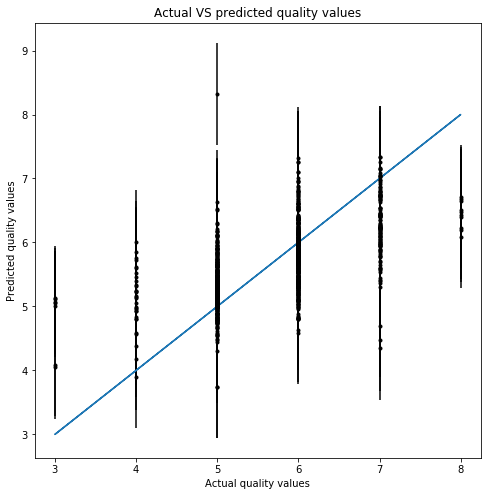

In [12]:
# plotting Actual vs Predicted
  
y = y_predicted
x = ytest
dy = 0.8
plt.figure(figsize=(8,8))
plt.title("Actual VS predicted quality values")
plt.xlabel('Actual quality values')
plt.ylabel('Predicted quality values')
plt.plot(x, x,)
plt.errorbar(x, y, yerr=dy, fmt='.k');


**[Back To Top](#Document-Outline)**

### Step 6: Model 2 stage 1- Autoencoder with 1 hidden layer

* Autoencoder with 1 hidden layer is built.
* The input and output layers of the autoencoder have 11 neurons. The hidden layer has 9 neurons. Weights have been tied.
* The entire training set X_train is used to train the network.

In [13]:

#hyperparams
n_inputs = 11
n_hidden1 = 9
n_outputs = n_inputs

learning_rate = 0.01
l2_reg = 0.0001

#model 
activation = tf.nn.elu
regularizer = tf.contrib.layers.l2_regularizer(l2_reg)
initializer = tf.contrib.layers.variance_scaling_initializer()

X = tf.placeholder(tf.float32, shape=[None, n_inputs])

weights1_init = initializer([n_inputs, n_hidden1])

weights1 = tf.Variable(weights1_init, dtype=tf.float32, name="weights1")
weights2 = tf.transpose(weights1, name="weights2") #tied weight

biases1 = tf.Variable(tf.zeros(n_hidden1), name="biases1")
biases2 = tf.Variable(tf.zeros(n_outputs), name="biases2")

hidden1 = activation(tf.matmul(X, weights1) + biases1)
outputs = tf.matmul(hidden1, weights2) + biases2

reconstruction_loss = tf.reduce_mean(tf.square(outputs - X))
reg_loss = regularizer(weights1)
loss = reconstruction_loss + reg_loss

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

**[Back To Top](#Document-Outline)**

### Step 7: Train the autoencoder

* A session is created to train the autoencoder, and a saver node to save the graph.
* Weight matrix **w1** (11x9 matrix) and the bias **b1** (a vector of 9 elements) are stored after training as well.
* Additionally, a **custom next_batch function** is written which randomly shuffles input data and returns a batch of specified batch size for training.

In [14]:
# next_batch function for wine dataset
# function randomly shuffles input data and returns a batch of specified batch size

def next_batch(X_train, batch_size):
    idx = np.arange(0 , len(X_train))
    np.random.shuffle(idx)
    idx = idx[:batch_size]
    data_shuffle = [X_train[i] for i in idx]
    
    return np.asarray(data_shuffle)

In [15]:
# training the autoencoder, saving the graph, w1 and b1
saver = tf.train.Saver()

import sys
n_epochs = 1000
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        n_batches = len(X_train) // batch_size
        for iteration in range(n_batches):
            #print("\r{}%".format(100 * iteration // n_batches), end="") 
            sys.stdout.flush()                                          
            X_batch = next_batch(X_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch})
        loss_train = reconstruction_loss.eval(feed_dict={X: X_batch}) 
    print("Train MSE for autoencoder:", loss_train)
    #saving w1 and b1 for future    
    w1 = weights1.eval()
    b1 = biases1.eval()
    
    saver.save(sess, "./autoencoder.ckpt");

Train MSE for autoencoder: 0.0033975518


'./autoencoder.ckpt'

In [16]:
# uncomment to view the arrays w1 and b1
# w1
# b1

**[Back To Top](#Document-Outline)**

### Step 8: 2nd stage of model 2 - DNNRegressor

* For the 2nd stage of model 2, an MLP is built using the tf.estimator.DNNRegressor class same as model 1, with the same hyperparameter values, except that the input layer now has 9 neurons.

In [17]:
# all hyper parameters are same as in model 1
# feature_columns changed to 9

stage2 = tf.estimator.DNNRegressor(
    feature_columns = [tf.feature_column.numeric_column('X', shape = (9,))],
    hidden_units=[n_hidden1, n_hidden2],
    optimizer=tf.train.ProximalAdagradOptimizer(learning_rate=learning_rate,l1_regularization_strength=l1_reg_strength)
    )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpbk3q6nlo', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11d532c50>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


**[Back To Top](#Document-Outline)**

### Step 9: Apply  transformation to the labelled training data and train stage 2 DNN regressor

* Transformation applied: **X_train_new = X train labelled . W1 + b1** where '.' denotes matrix multiplication. The output X_train_new matrix now has 9 columns
* The trained autoencoder allowed us to reduce the dimensions from 11 to 9. Shape of the new data is printed below
* Stage 2 DNNRegressor has been trained using this new labelled training set.

In [18]:
# applying transformation
X_train_new = xtrain.dot(w1) + b1 # xtrain is the labelled data used by model 1

print("Shape of X_train_new:", X_train_new.shape)

Shape of X_train_new: (640, 9)


In [19]:
##training stage2 DNN same as model 1, but with X_train_new

for epoch in range(epochs):
    stage2.train(input_fn = training_input_fn(X_train_new, ytrain, batch_size=batch_size, num_epochs=num_epochs),
            steps = steps);

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpbk3q6nlo/model.ckpt.
INFO:tensorflow:loss = 36736.39, step = 1
INFO:tensorflow:global_step/sec: 483.985
INFO:tensorflow:loss = 32.54264, step = 101 (0.208 sec)
INFO:tensorflow:global_step/sec: 486.72
INFO:tensorflow:loss = 28.474049, step = 201 (0.207 sec)
INFO:tensorflow:global_step/sec: 395.999
INFO:tensorflow:loss = 31.529697, step = 301 (0.251 sec)
INFO:tensorflow:global_step/sec: 550.267
INFO:tensorflow:loss = 32.4791, step = 401 (0.182 sec)
INFO:tensorflow:global_step/sec: 582.985
INFO:tensorflow:loss = 35.59029, step = 501 (0.171 sec)
INFO:tensorflow:global_step/sec: 530.492
INFO:tensorflow:loss = 36.10921, step = 601 (0.193 sec)
INFO:tensorflow:glob

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpbk3q6nlo/model.ckpt-4000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 4001 into /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpbk3q6nlo/model.ckpt.
INFO:tensorflow:loss = 18.171808, step = 4001
INFO:tensorflow:global_step/sec: 459.181
INFO:tensorflow:loss = 22.424507, step = 4101 (0.219 sec)
INFO:tensorflow:global_step/sec: 603.831
INFO:tensorflow:loss = 18.236654, step = 4201 (0.166 sec)
INFO:tensorflow:global_step/sec: 599.356
INFO:tensorflow:loss = 25.288158, step = 4301 (0.169 sec)
INFO:tensorflow:global_step/sec: 560.899
INFO:tensorflow:loss = 25.625435, step = 4401 (0.178 sec)
INFO:tensorflow:global_step/sec: 646.621
INFO:tensorflow:loss = 21.317715, step 

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpbk3q6nlo/model.ckpt-8000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 8001 into /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpbk3q6nlo/model.ckpt.
INFO:tensorflow:loss = 28.357258, step = 8001
INFO:tensorflow:global_step/sec: 319.278
INFO:tensorflow:loss = 16.03752, step = 8101 (0.315 sec)
INFO:tensorflow:global_step/sec: 415.378
INFO:tensorflow:loss = 21.471542, step = 8201 (0.241 sec)
INFO:tensorflow:global_step/sec: 378.352
INFO:tensorflow:loss = 23.067997, step = 8301 (0.267 sec)
INFO:tensorflow:global_step/sec: 445.397
INFO:tensorflow:loss = 19.83707, step = 8401 (0.224 sec)
INFO:tensorflow:global_step/sec: 492.024
INFO:tensorflow:loss = 23.98646, step = 8

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpbk3q6nlo/model.ckpt-12000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 12001 into /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpbk3q6nlo/model.ckpt.
INFO:tensorflow:loss = 24.499651, step = 12001
INFO:tensorflow:global_step/sec: 389.865
INFO:tensorflow:loss = 23.129202, step = 12101 (0.258 sec)
INFO:tensorflow:global_step/sec: 566.829
INFO:tensorflow:loss = 18.72516, step = 12201 (0.177 sec)
INFO:tensorflow:global_step/sec: 568.873
INFO:tensorflow:loss = 17.088818, step = 12301 (0.175 sec)
INFO:tensorflow:global_step/sec: 557.028
INFO:tensorflow:loss = 21.043783, step = 12401 (0.184 sec)
INFO:tensorflow:global_step/sec: 559.814
INFO:tensorflow:loss = 35.286575,

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpbk3q6nlo/model.ckpt-16000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 16001 into /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpbk3q6nlo/model.ckpt.
INFO:tensorflow:loss = 24.231707, step = 16001
INFO:tensorflow:global_step/sec: 371.105
INFO:tensorflow:loss = 21.081072, step = 16101 (0.271 sec)
INFO:tensorflow:global_step/sec: 509.155
INFO:tensorflow:loss = 28.826326, step = 16201 (0.196 sec)
INFO:tensorflow:global_step/sec: 605.236
INFO:tensorflow:loss = 21.565079, step = 16301 (0.165 sec)
INFO:tensorflow:global_step/sec: 624.891
INFO:tensorflow:loss = 22.31385, step = 16401 (0.162 sec)
INFO:tensorflow:global_step/sec: 489.395
INFO:tensorflow:loss = 22.21592, 

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpbk3q6nlo/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 20001 into /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpbk3q6nlo/model.ckpt.
INFO:tensorflow:loss = 22.251457, step = 20001
INFO:tensorflow:global_step/sec: 477.795
INFO:tensorflow:loss = 14.183558, step = 20101 (0.211 sec)
INFO:tensorflow:global_step/sec: 633.449
INFO:tensorflow:loss = 22.528147, step = 20201 (0.158 sec)
INFO:tensorflow:global_step/sec: 579.501
INFO:tensorflow:loss = 22.024836, step = 20301 (0.173 sec)
INFO:tensorflow:global_step/sec: 604.968
INFO:tensorflow:loss = 14.309189, step = 20401 (0.165 sec)
INFO:tensorflow:global_step/sec: 588.558
INFO:tensorflow:loss = 22.132269

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpbk3q6nlo/model.ckpt-24000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 24001 into /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpbk3q6nlo/model.ckpt.
INFO:tensorflow:loss = 21.571962, step = 24001
INFO:tensorflow:global_step/sec: 480.804
INFO:tensorflow:loss = 15.327472, step = 24101 (0.209 sec)
INFO:tensorflow:global_step/sec: 652.163
INFO:tensorflow:loss = 21.130976, step = 24201 (0.154 sec)
INFO:tensorflow:global_step/sec: 649.067
INFO:tensorflow:loss = 21.355171, step = 24301 (0.154 sec)
INFO:tensorflow:global_step/sec: 515.212
INFO:tensorflow:loss = 13.17275, step = 24401 (0.194 sec)
INFO:tensorflow:global_step/sec: 562.312
INFO:tensorflow:loss = 24.151978,

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpbk3q6nlo/model.ckpt-28000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 28001 into /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpbk3q6nlo/model.ckpt.
INFO:tensorflow:loss = 18.388332, step = 28001
INFO:tensorflow:global_step/sec: 462.744
INFO:tensorflow:loss = 16.18224, step = 28101 (0.218 sec)
INFO:tensorflow:global_step/sec: 487.007
INFO:tensorflow:loss = 23.178368, step = 28201 (0.205 sec)
INFO:tensorflow:global_step/sec: 590.208
INFO:tensorflow:loss = 18.549738, step = 28301 (0.169 sec)
INFO:tensorflow:global_step/sec: 712.504
INFO:tensorflow:loss = 26.769852, step = 28401 (0.140 sec)
INFO:tensorflow:global_step/sec: 762.049
INFO:tensorflow:loss = 23.203817,

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpbk3q6nlo/model.ckpt-32000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 32001 into /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpbk3q6nlo/model.ckpt.
INFO:tensorflow:loss = 27.183853, step = 32001
INFO:tensorflow:global_step/sec: 446.598
INFO:tensorflow:loss = 22.508366, step = 32101 (0.225 sec)
INFO:tensorflow:global_step/sec: 585.319
INFO:tensorflow:loss = 29.50247, step = 32201 (0.171 sec)
INFO:tensorflow:global_step/sec: 617.052
INFO:tensorflow:loss = 18.477608, step = 32301 (0.162 sec)
INFO:tensorflow:global_step/sec: 600.897
INFO:tensorflow:loss = 29.892237, step = 32401 (0.168 sec)
INFO:tensorflow:global_step/sec: 289.78
INFO:tensorflow:loss = 27.493032, 

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpbk3q6nlo/model.ckpt-36000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 36001 into /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpbk3q6nlo/model.ckpt.
INFO:tensorflow:loss = 22.512589, step = 36001
INFO:tensorflow:global_step/sec: 354.82
INFO:tensorflow:loss = 28.311413, step = 36101 (0.283 sec)
INFO:tensorflow:global_step/sec: 595.941
INFO:tensorflow:loss = 21.556438, step = 36201 (0.170 sec)
INFO:tensorflow:global_step/sec: 672.183
INFO:tensorflow:loss = 20.312489, step = 36301 (0.148 sec)
INFO:tensorflow:global_step/sec: 520.404
INFO:tensorflow:loss = 24.147411, step = 36401 (0.194 sec)
INFO:tensorflow:global_step/sec: 633.06
INFO:tensorflow:loss = 27.206373, 

**[Back To Top](#Document-Outline)**

### Step 10: Apply transformation to test set and report the RMSEs


In [20]:
# applying transformation
X_test_new = xtest.dot(w1) + b1 # xtest is the same as the testset used in model 1 (60% of total data)

print("Shape of X_test_new:", X_test_new.shape)

Shape of X_test_new: (960, 9)


In [21]:
#evaluation train
model2_train = stage2.evaluate(input_fn = test_input_fn(X_train_new, ytrain))
train_mse_model2 = model2_train["average_loss"]

#evaluation test
model2_test = stage2.evaluate(input_fn = test_input_fn(X_test_new, ytest))
test_mse_model2 = model2_test["average_loss"]


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-01-03:44:17
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpbk3q6nlo/model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-01-03:44:17
INFO:tensorflow:Saving dict for global step 40000: average_loss = 0.44605857, global_step = 40000, loss = 57.095497
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-01-03:44:17
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpbk3q6nlo/model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-01-03:44:18
INFO:tensorflow:Saving

In [22]:
print("\nAverage MSE during training:", train_mse_model2)
print("RMSE during training:", np.sqrt(train_mse_model2))
print("---------------------------------------------------------------------")
print("Average MSE during evaluation:",test_mse_model2)
print("RMSE during evaluation:", np.sqrt(test_mse_model2))


Average MSE during training: 0.44605857
RMSE during training: 0.6678762
---------------------------------------------------------------------
Average MSE during evaluation: 0.4756853
RMSE during evaluation: 0.6896994


### Plot of actual vs predicted Quality values - Model 2
* Similar to model 1, the points on the actual vs predicted graph don't quite lie on the diagonal, indicating that the RMSE is high around those values.
* Quality values 5,6 seem to be predicted better than the others.
* The predicted values are larger than actual for quality values 3,4 and predicted values are smaller for quality values 7, 8 than expected.

In [23]:
#predictions

predictions = stage2.predict(input_fn=test_input_fn(X_test_new, ytest));

y_predicted_model2 = np.array(list(p['predictions'] for p in predictions))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/b1/781qx_wx6tg2kzc703sh4dx40000gn/T/tmpbk3q6nlo/model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


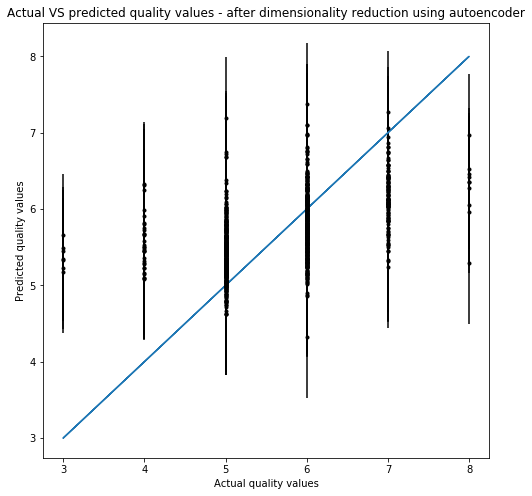

In [24]:
# plotting Actual vs Predicted
  
y = y_predicted_model2
x = ytest
dy = 0.8
plt.figure(figsize=(8,8))
plt.title("Actual VS predicted quality values - after dimensionality reduction using autoencoder")
plt.xlabel('Actual quality values')
plt.ylabel('Predicted quality values')
plt.plot(x, x)
plt.errorbar(x, y, yerr=dy, fmt='.k');

### Performance comparison on the current run
* In both train and test, Model 1 gives better RMSE than Model 2, however, it is notable that after reduction of dimensions from 11 to 9 (during autoencoder), the increase in RMSE is not too huge.
* Below is a tabulation and a bar graph showing RMSEs on train and test sets of both model 1 and model 2.

In [25]:
performance = pd.DataFrame({'RMSE of Model': ['Training model 1', 'Testing model 1',
                                                    'Training model 2', 'Testing model 2'],
    'Scores': [np.sqrt(train_mse_model1),np.sqrt(test_mse_model1),np.sqrt(train_mse_model2),np.sqrt(test_mse_model2)]})

,RMSE of Model,Scores
0,Training model 1,0.582301
1,Testing model 1,0.656806
2,Training model 2,0.667876
3,Testing model 2,0.689699


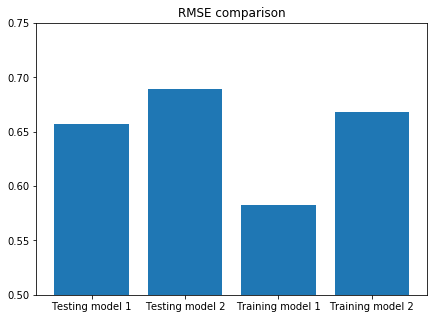

In [26]:
performance

_= plt.figure(figsize=(7,5))
_= plt.bar(performance['RMSE of Model'],performance['Scores'])
_= plt.title("RMSE comparison")
_= plt.ylim(ymin = 0.5, ymax = 0.75 )

**[Back To Top](#Document-Outline)**

### Step 11: Reporting performance on multiple runs

* All the cells of the notebook were run 5 times to analyze RMSEs rather than depending on a single run outcomes (as above). To ensure this randomseed was set using system clock time in [Step 0](#Step-0:-Set-up-imports). 
* In all the 5 runs we see Model 1 gives better RMSE than Model 2, however, it is notable that after reduction of dimensions from 11 to 9 (during autoencoder), the increase in RMSE is not too huge.
* Below is a graph showing RMSEs on test set of model 1 and model 2 in all 5 runs, the values of which are very similar to the single run above. 

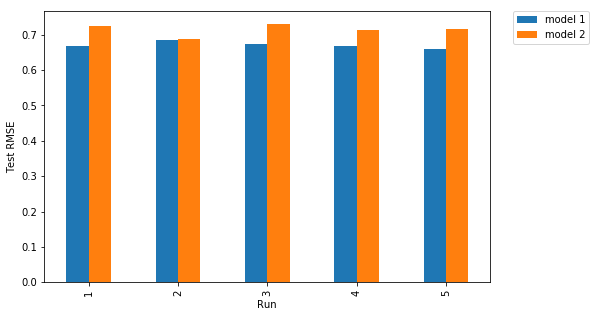

In [27]:
#values of multiple runs were recorded manually and stored in a csv
multiple_runs = pd.read_csv("Datasets/mutlipleruns_performance.csv")

#table = pd.pivot_table(multiple_runs,values=['Test_RMSE'],index=['Run','Model']).plot(kind='bar')

%matplotlib inline
import seaborn as sns
 

pd.pivot_table(multiple_runs, index= 'Run', columns= 'Model', values= "Test_RMSE").plot(kind= 'bar', figsize=(8,5))
_= plt.ylabel("Test RMSE")
_= plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**[Back To Top](#Document-Outline)**